In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import time
import cartopy.crs as ccrs


In [2]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


In [3]:
logo = plt.imread('../../Branding/light_logo_1.png')

In [4]:

start_time = time.time()

africa_rivers = pd.concat([gpd.read_file("../../Nature/rivers/data/rivers/namerica/a00000009.gdbtable"),
                           gpd.read_file("../../Nature/rivers/data/rivers/artic/a00000009.gdbtable")])

print("--- %s seconds ---" % (time.time() - start_time))

print(africa_rivers)

--- 98.18778896331787 seconds ---
        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0       70000001          0  70000001       1.72         0.0         5.6   
1       70000002          0  70000002       3.38         0.0         8.3   
2       70000003          0  70000003       1.94         0.0         7.8   
3       70000004          0  70000004       1.12         0.0         8.5   
4       70000005          0  70000005       5.95         0.0        10.1   
...          ...        ...       ...        ...         ...         ...   
324073  80324074          0  80324074       0.98         0.0         2.7   
324074  80324075          0  80324075       0.43         0.0         2.1   
324075  80324076          0  80324076       1.91         0.0         3.1   
324076  80324077          0  80324077       1.85         0.0         3.3   
324077  80324078          0  80324078       1.82         0.0         3.0   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS 

In [5]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'North America']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
print(africa_lakes)

     featurecla  scalerank              name        name_abb     name_alt  \
5          Lake          0   Great Bear Lake   Great Bear L.         None   
6          Lake          0  Great Slave Lake  Great Slave L.         None   
7          Lake          0        McLeod Bay      McLeod Bay         None   
8          Lake          0     Lake Winnipeg     L. Winnipeg         None   
9          Lake          0         Lake Erie         L. Erie  Great Lakes   
...         ...        ...               ...             ...          ...   
469        Lake          3       Saginaw Bay     Saginaw Bay  Great Lakes   
470        Lake          3     North Channel       North Ch.  Great Lakes   
471        Lake          2      Georgian Bay    Georgian Bay  Great Lakes   
1344       Lake          3   St. Marys River    St. Marys R.  Great Lakes   
1345       Lake          7    Whitefish Lake    Whitefish L.         None   

      note delta dam_name  year         admin  ...          name_tr  \
5   

In [7]:
#africa_rivers_tmp = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 7]
africa_rivers_tmp = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [8]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/namerica/hydrobasins_northam.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/camerica/hydrobasins_centralam.shp")])
print(basins)

      SUB_BAS  TO_BAS  MAJ_BAS                   SUB_NAME  \
0        1001    1005     1001              Upper Roanoke   
1        1002    1004     1001                   Banister   
2        1003    1004     1001                  Upper Dan   
3        1004    1005     1001                  Lower Dan   
4        1005    -999     1001              Lower Roanoke   
...       ...     ...      ...                        ...   
1800    14124    -999     2014  San Andés and Providencia   
1801    14124    -999     2014  San Andés and Providencia   
1802    14124    -999     2014  San Andés and Providencia   
1803    14124    -999     2014  San Andés and Providencia   
1804    14124    -999     2014  San Andés and Providencia   

                                  MAJ_NAME  SUB_AREA  MAJ_AREA  LEGEND  \
0     Gulf of Mexico, North Atlantic Coast      8689    701385       1   
1     Gulf of Mexico, North Atlantic Coast      1540    701385       1   
2     Gulf of Mexico, North Atlantic Coast   

In [9]:
print(len(basins.MAJ_NAME.unique().tolist()))

34


In [10]:
import pandas as pd
import random

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222','#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222']

colours_i_like = ['black', 'orange', '#BE0032', '#808000', '#483d8b', '#3cb371', 
                 '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                 '#882D17', '#228B22', '#dc143c', '#875692', '#2f4f4f', '#0000ff',
                 '#ff00ff', '#1e90ff', '#db7093', 'black', '#ff1493', 'darkgreen', 
                 '#ee82ee', '#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', 'orange', '#F3C300',  'blue',]

#random.shuffle(colours_i_like)
print(colours_i_like)
print(basins.MAJ_NAME.unique().tolist())
colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

res = {}
for value, key in zip(colours_i_like, basins.MAJ_NAME.unique().tolist()):
    res[key] = value
    
print(res)

['black', 'orange', '#BE0032', '#808000', '#483d8b', '#3cb371', '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', '#882D17', '#228B22', '#dc143c', '#875692', '#2f4f4f', '#0000ff', '#ff00ff', '#1e90ff', '#db7093', 'black', '#ff1493', 'darkgreen', '#ee82ee', '#A1CAF1', '#875692', '#008856', '#0067A5', '#BE0032', '#222222', 'orange', '#F3C300', 'blue']
['Gulf of Mexico, North Atlantic Coast', 'United States, North Atlantic Coast', 'Mississippi - Missouri', 'Gulf Coast', 'California', 'Great Basin', 'North America, Colorado', 'Columbia and Northwestern United States', 'Pacific and Arctic Coast', 'Fraser', 'Saskatchewan - Nelson', 'Northwest Territories', 'Hudson Bay Coast', 'Atlantic Ocean Seaboard', 'Churchill', 'St Lawrence', 'St John', 'Mackenzie', 'Arctic Ocean Islands', 'Río Grande - Bravo', 'Mexico, Northwest Coast', 'Baja California', 'Mexico, Interior', 'North Gulf', 'Río Verde', 'Río Lerma', 'Pacific Central Coast', 'Río Balsas', 'Isthmus of Tehuantepec', 'Grijalva -

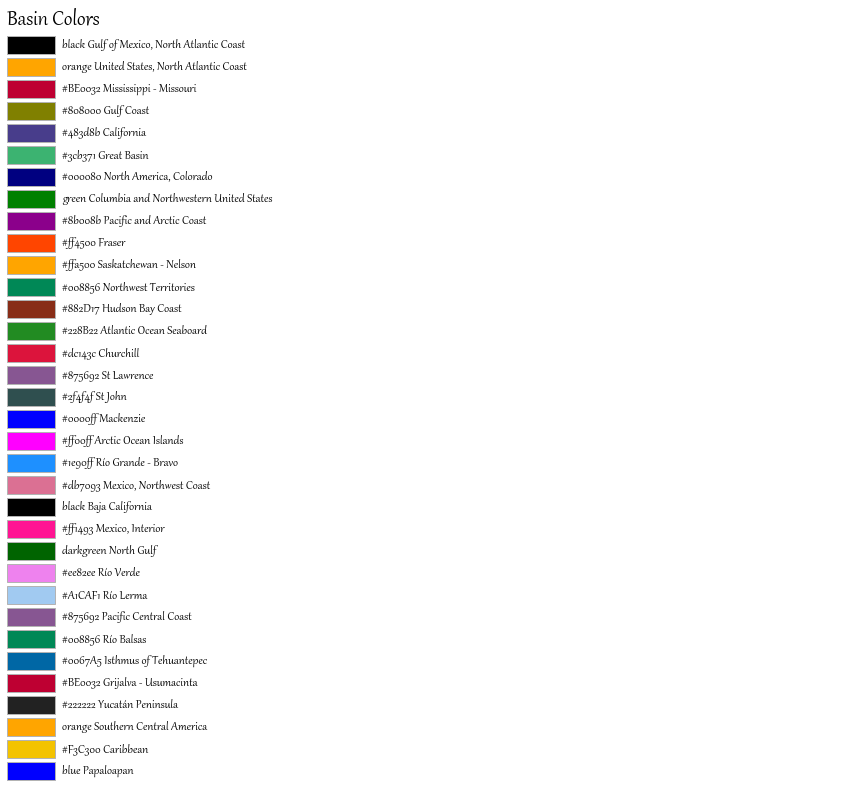

In [11]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )
plt.savefig("outputs/namerica2.png", dpi=600, bbox_inches='tight')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


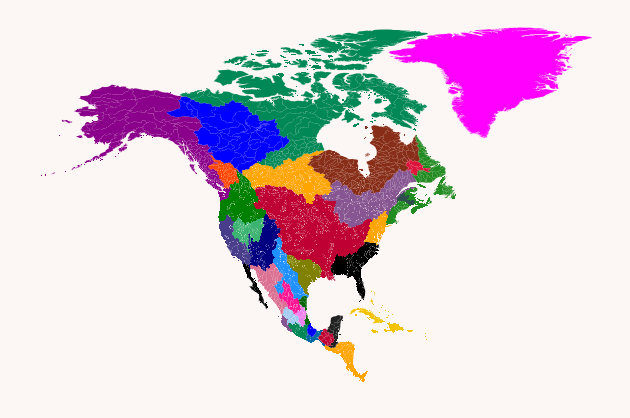

In [12]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/namerica4.png", dpi=600, bbox_inches='tight')

In [13]:
rivers_basins = gpd.sjoin(africa_rivers_tmp, basins, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
print(rivers_basins.columns)

Index(['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM',
       'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS',
       'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'Shape_Length',
       'geometry', 'index_right', 'SUB_BAS', 'TO_BAS', 'MAJ_BAS', 'SUB_NAME',
       'MAJ_NAME', 'SUB_AREA', 'MAJ_AREA', 'LEGEND', 'basin', 'colors'],
      dtype='object')


In [15]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.03, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.03, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.03, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.03, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.03, max_value=0.4)


rivers_basins['LW_COMBINED'] = rivers_basins['LW_DIST_UP_KM'] +  rivers_basins['LW_CATCH_SKM']

In [16]:
from shapely.ops import unary_union

gdf = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
namerica = gdf.loc[gdf['CONTINENT'] == 'North America']
usa = namerica.loc[namerica['SOVEREIGNT'] == 'United States of America']
namerica = namerica.loc[namerica['SOVEREIGNT'] != 'United States of America']
namerica = namerica.loc[namerica['SOVEREIGNT'] != 'Denmark']

usa = usa.loc[usa['scalerank'] == 0]
Polygons = list(usa.iloc[0].geometry)
usa1 = usa.copy()
usa2 = usa.copy()
usa1.geometry = [Polygons[1]]
usa2.geometry = [Polygons[0]]
usa = pd.concat([usa1, usa2])

namerica = pd.concat([usa, namerica])

x = unary_union(namerica.geometry.tolist())
y = x.boundary
namerica = gpd.GeoDataFrame(pd.DataFrame({'name': ['North America']}), crs="EPSG:4326", geometry=[y])

C:\Users\symmy\AppData\Local\Temp\ipykernel_4160\1467175075.py:10: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(usa.iloc[0].geometry)
C:\Users\symmy\AppData\Local\Temp\ipykernel_4160\1467175075.py:10: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(usa.iloc[0].geometry)


In [17]:
print(africa_lakes)

     featurecla  scalerank              name        name_abb     name_alt  \
5          Lake          0   Great Bear Lake   Great Bear L.         None   
6          Lake          0  Great Slave Lake  Great Slave L.         None   
7          Lake          0        McLeod Bay      McLeod Bay         None   
8          Lake          0     Lake Winnipeg     L. Winnipeg         None   
9          Lake          0         Lake Erie         L. Erie  Great Lakes   
...         ...        ...               ...             ...          ...   
469        Lake          3       Saginaw Bay     Saginaw Bay  Great Lakes   
470        Lake          3     North Channel       North Ch.  Great Lakes   
471        Lake          2      Georgian Bay    Georgian Bay  Great Lakes   
1344       Lake          3   St. Marys River    St. Marys R.  Great Lakes   
1345       Lake          7    Whitefish Lake    Whitefish L.         None   

      note delta dam_name  year         admin  ...          name_tr  \
5   

In [18]:
logo = plt.imread('../../Branding/light_logo_1.png')

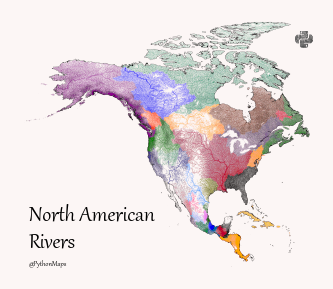

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
namerica.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.67, 0.77, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.06, 0.12, "North American\nRivers",
              size=18,
              color='black',
              transform = ax.transAxes)
txt = ax.text(0.06, 0.05, "@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)
ax.axis('off')
#ax.set_xlim(-170, -50)
plt.savefig("outputs/namerica_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

In [24]:

namerica = gdf.loc[gdf['CONTINENT'] == 'North America']
usa = namerica.loc[namerica['SOVEREIGNT'] == 'United States of America']
namerica = namerica.loc[namerica['SOVEREIGNT'] != 'United States of America']
namerica = namerica.loc[namerica['SOVEREIGNT'] != 'Denmark']

usa = usa.loc[usa['scalerank'] == 0]
Polygons = list(usa.iloc[0].geometry)
usa1 = usa.copy()
usa2 = usa.copy()
usa1.geometry = [Polygons[1]]
usa2.geometry = [Polygons[0]]
usa = pd.concat([usa1, usa2])

namerica = pd.concat([usa, namerica])

namerica['boundary'] = namerica.geometry.boundary
namerica['geometry'] = namerica['boundary'].copy()


C:\Users\symmy\AppData\Local\Temp\ipykernel_4160\1230244889.py:7: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(usa.iloc[0].geometry)
C:\Users\symmy\AppData\Local\Temp\ipykernel_4160\1230244889.py:7: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(usa.iloc[0].geometry)


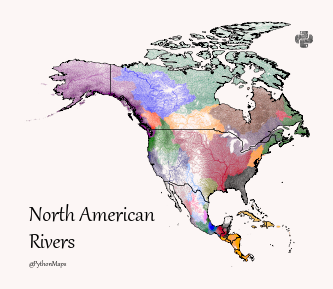

In [26]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
namerica.plot(ax=ax, color="black", lw=0.3)

newax = fig.add_axes([0.67, 0.77, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.06, 0.12, "North American\nRivers",
              size=18,
              color='black',
              transform = ax.transAxes)
txt = ax.text(0.06, 0.05, "@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)
ax.axis('off')
#ax.set_xlim(-170, -50)
plt.savefig("outputs/namerica_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

In [22]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
namerica.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.67, 0.77, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.06, 0.05, "North American Rivers @PythonMaps\nData Source - hydrosheds.org",
              size=6,
              color='black',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_xlim(-170, -50)
plt.savefig("outputs/namericavc.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
namerica.plot(ax=ax, color="black", lw=0.1)

ax.axis('off')
ax.set_xlim(-170, -50)
plt.savefig("outputs/client_namerica.png", dpi=2000, bbox_inches='tight')
plt.show()

In [ ]:

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
namerica.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.62, 0.73, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.05, "North American Rivers @PythonMaps\nThis map shows the rivers and waterways of North America\ncoloured according to the major hydrological basin that they are part of.\nData Source - https://www.hydrosheds.org/products/hydrorivers",
              size=4,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
ax.set_xlim(-170, -50)
plt.savefig("outputs/namerica_vc.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')

In [ ]:
usa = df.loc[df['ADMIN'] == 'United States of America']
Polygons = list(usa.iloc[0].geometry)
usa.geometry = [Polygons[0]]

In [ ]:
rivers_basins = rivers_basins.drop(columns=['index_right'])
print(rivers_basins.columns)

In [ ]:
usa_rivers_basins = gpd.sjoin(rivers_basins, usa, op="within")
usa_lakes = gpd.sjoin(africa_lakes, usa, op="within")

In [ ]:
usa_rivers_basins['LW_DIST_UP_KM'] = usa_rivers_basins['LW_DIST_UP_KM'] * 1.5

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

usa_rivers_basins.plot(ax=ax, edgecolor='face', color=usa_rivers_basins['colors'], lw=usa_rivers_basins['LW_DIST_UP_KM'])
usa_lakes.plot(ax=ax, color='#FCF6F5FF')
logo = plt.imread('../../Branding/globe.png')

newax = fig.add_axes([0.7, 0.76, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.05, "USA Rivers \n@PythonMaps",
              size=8,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_xlim(-170, -50)
plt.savefig("outputs/namerica7.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#090909')
fig.set_size_inches(7, 3.5)

usa_rivers_basins.plot(ax=ax, edgecolor='face', color=usa_rivers_basins['colors'], lw=usa_rivers_basins['LW_DIST_UP_KM'])
usa_lakes.plot(ax=ax, color='#090909')
logo = plt.imread('../../Branding/globe.png')

newax = fig.add_axes([0.7, 0.76, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.05, "USA Rivers \n@PythonMaps",
              size=8,
              color='white',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_xlim(-170, -50)
plt.savefig("outputs/namerica8.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import cartopy.crs as ccrs

fig = plt.figure(facecolor='#FCF6F5FF')
ax = plt.axes(projection=ccrs.Mercator())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'], transform=ccrs.Geodetic())
africa_lakes.plot(ax=ax, color='#FCF6F5FF', transform=ccrs.Geodetic())

#newax = fig.add_axes([0.83, 0.67, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.0, "South American Rivers \n@PythonMaps",
#              size=6,
#              color='grey',
#              transform = ax.transAxes)

ax.axis('off')
#ax.set_xlim(-170, -50)

plt.savefig("outputs/namerica9.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
for label in ['LW_DIST_UP_KM', 'LW_LENGTH_KM', 'LW_CATCH_SKM', 'LW_DIS_AV_CMS', 'LW_UPLAND_SKM']:
    fig, ax = plt.subplots(facecolor='#FCF6F5FF')
    fig.set_size_inches(7, 3.5)

    rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins[label])
    africa_lakes.plot(ax=ax, color='#FCF6F5FF')

    #newax = fig.add_axes([0.83, 0.67, 0.1, 0.1], anchor='NE', zorder=-1)
    #newax.imshow(logo)
    #newax.axis('off')
    #txt = ax.text(0.02, 0.0, "South American Rivers \n@PythonMaps",
    #              size=6,
    #              color='grey',
    #              transform = ax.transAxes)

    ax.axis('off')
    plt.savefig(f"outputs/{label}.png", dpi=600, bbox_inches='tight')
    plt.show()

In [ ]:
import cartopy.crs as ccrs

fig = plt.figure(facecolor='#FCF6F5FF')
ax = plt.axes(projection=ccrs.Mercator())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'], transform=ccrs.Geodetic())
africa_lakes.plot(ax=ax, color='#FCF6F5FF', transform=ccrs.Geodetic())

#newax = fig.add_axes([0.83, 0.67, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.0, "South American Rivers \n@PythonMaps",
#              size=6,
#              color='grey',
#              transform = ax.transAxes)

#ax.axis('off')
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 7)

ax1 = plt.subplot(1,3,1)
rivers_basins.plot(ax=ax1, color='blue', lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax1, color='#FCF6F5FF')
ax1.set_title("Discharge", fontfamily='fantasy')
ax1.axis('off')

ax2 = plt.subplot(1,3,2)
rivers_basins.plot(ax=ax2, color='blue', lw=rivers_basins['LW_LENGTH_KM'])
africa_lakes.plot(ax=ax2, color='#FCF6F5FF')
ax2.set_title("Width", fontfamily='fantasy')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
rivers_basins.plot(ax=ax3, color='blue', lw=rivers_basins['LW_CATCH_SKM'])
africa_lakes.plot(ax=ax3, color='#FCF6F5FF')
ax3.set_title("Depth", fontfamily='fantasy')
ax3.axis('off')

plt.savefig("outputs/raw4.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable")

print(africa_rivers)

In [ ]:
tmp_df = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [ ]:
leftSpan = np.amax(tmp_df['DIST_UP_KM']) - np.amin(tmp_df['DIST_UP_KM'])
rightSpan = 0.7 - 0.01
valueScaled = (tmp_df['DIST_UP_KM'] - np.amin(tmp_df['DIST_UP_KM'])) / leftSpan
tmp_df['lw'] = 0.01 + (valueScaled * rightSpan)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

tmp_df.plot(ax=ax, color='blue', lw=tmp_df['lw'])
africa_lakes.plot(ax=ax, color='blue', alpha=1)

ax.axis('off')

plt.savefig("outputs/thumbnail.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

tmp_df.plot(ax=ax, color='blue', lw=tmp_df['lw'])
africa_lakes.plot(ax=ax, color='blue', alpha=1)

ax.axis('off')
ax.set_ylim(-20, 20)
plt.savefig("outputs/thumbnail.png", dpi=600, bbox_inches='tight')
plt.show()